# Data Checking

To Do:
1. [Done] since the initial result is so bad, try to see if there is misconfiguration (change data type categorical) and do without gridsearch first - AUC PR 35%, cant predict positive class correctly. After fine tuning, it only improved slightly to AUC PR 37%.
2. [Done] modelling using only importance features - result is similar with AUC PR 37%.
3. Try other algorithm: CatBoost or Deep Learning.

Conclusioin: Xgboost does not produce acceptable result for this case (aka unable to predict the heart attack occurence)

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [157]:
# Data Checking
df = pd.read_csv('heart_disease_health_indicators.csv')

print("Number of columns: ", len(df.columns)) 
print("Number of columns: ", len(df))
print("Columns name: ", df.columns)
df.head()


Number of columns:  22
Number of columns:  253661
Columns name:  Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [158]:
# Sample data part 1
df.iloc[:5, :11]

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies
0,0,1,1,1,40,1,0,0,0,0,1
1,0,0,0,0,25,1,0,0,1,0,0
2,0,1,1,1,28,0,0,0,0,1,0
3,0,1,0,1,27,0,0,0,1,1,1
4,0,1,1,1,24,0,0,0,1,1,1


In [159]:
# Sample data part 2
df.iloc[:5, 11:]

,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,5,18,15,1,0,9,4,3
1,0,0,1,3,0,0,0,0,7,6,1
2,0,1,1,5,30,30,1,0,9,4,8
3,0,1,0,2,0,0,0,0,11,3,6
4,0,1,0,2,3,0,0,0,11,5,4


In [160]:
# Checking data types & missing values

print(df.info())

df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253661 entries, 0 to 253660
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HeartDiseaseorAttack  253661 non-null  int64
 1   HighBP                253661 non-null  int64
 2   HighChol              253661 non-null  int64
 3   CholCheck             253661 non-null  int64
 4   BMI                   253661 non-null  int64
 5   Smoker                253661 non-null  int64
 6   Stroke                253661 non-null  int64
 7   Diabetes              253661 non-null  int64
 8   PhysActivity          253661 non-null  int64
 9   Fruits                253661 non-null  int64
 10  Veggies               253661 non-null  int64
 11  HvyAlcoholConsump     253661 non-null  int64
 12  AnyHealthcare         253661 non-null  int64
 13  NoDocbcCost           253661 non-null  int64
 14  GenHlth               253661 non-null  int64
 15  MentHlth              253661 non-n

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [161]:
# df.describe()
df.iloc[:,:11].describe()[1:]

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies
mean,0.094173,0.428990,0.424113,0.962667,28.382475,0.443186,0.040570,0.296904,0.756577,0.634264,0.811437
std,0.292070,0.494933,0.494209,0.189578,6.608638,0.496763,0.197292,0.698147,0.429149,0.481637,0.391162
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000


In [162]:
df.iloc[:,11:].describe()[1:]

,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
mean,0.056201,0.951049,0.084164,2.511379,3.184778,4.242028,0.168221,0.440348,8.032197,5.050461,6.054052
std,0.230310,0.215766,0.277633,1.068472,7.412822,8.717905,0.374063,0.496430,3.054203,0.985718,2.071036
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [163]:
# Labels / DV

for i in df.columns:
    # print(i, df[i].unique())
    print(df.groupby([i]).agg({"Income": pd.Series.count, "HeartDiseaseorAttack": pd.Series.sum}))

                      Income  HeartDiseaseorAttack
HeartDiseaseorAttack                              
0                     229773                     0
1                      23888                 23888
        Income  HeartDiseaseorAttack
HighBP                              
0       144843                  5964
1       108818                 17924
          Income  HeartDiseaseorAttack
HighChol                              
0         146080                  7139
1         107581                 16749
           Income  HeartDiseaseorAttack
CholCheck                              
0            9470                   271
1          244191                 23617
     Income  HeartDiseaseorAttack
BMI                              
12        6                     1
13       21                     1
14       41                     8
15      132                    17
16      347                    52
..      ...                   ...
91        1                     0
92       32               

<AxesSubplot:title={'center':'HighBP'}, ylabel='Frequency'>

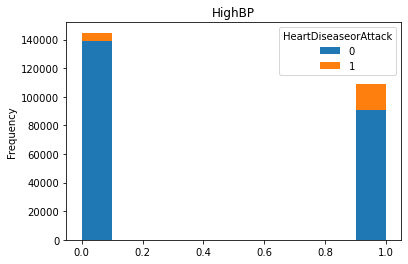

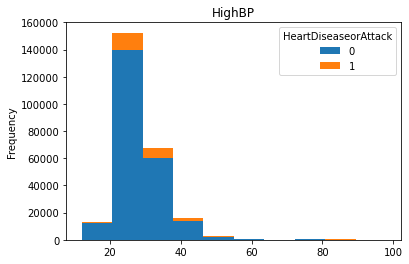

In [164]:
df.pivot(columns="HeartDiseaseorAttack")['HighBP'].plot(kind="hist", stacked=True, title='HighBP')
df.pivot(columns="HeartDiseaseorAttack")['BMI'].plot(kind="hist", stacked=True, title='HighBP')

array([[<AxesSubplot:title={'center':'HeartDiseaseorAttack'}>,
        <AxesSubplot:title={'center':'HighBP'}>],
       [<AxesSubplot:title={'center':'HighChol'}>,
        <AxesSubplot:title={'center':'CholCheck'}>],
       [<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'Smoker'}>],
       [<AxesSubplot:title={'center':'Stroke'}>,
        <AxesSubplot:title={'center':'Diabetes'}>],
       [<AxesSubplot:title={'center':'PhysActivity'}>,
        <AxesSubplot:title={'center':'Fruits'}>],
       [<AxesSubplot:title={'center':'Veggies'}>,
        <AxesSubplot:title={'center':'HvyAlcoholConsump'}>],
       [<AxesSubplot:title={'center':'AnyHealthcare'}>,
        <AxesSubplot:title={'center':'NoDocbcCost'}>],
       [<AxesSubplot:title={'center':'GenHlth'}>,
        <AxesSubplot:title={'center':'MentHlth'}>],
       [<AxesSubplot:title={'center':'PhysHlth'}>,
        <AxesSubplot:title={'center':'DiffWalk'}>],
       [<AxesSubplot:title={'center':'Sex'}>,
        

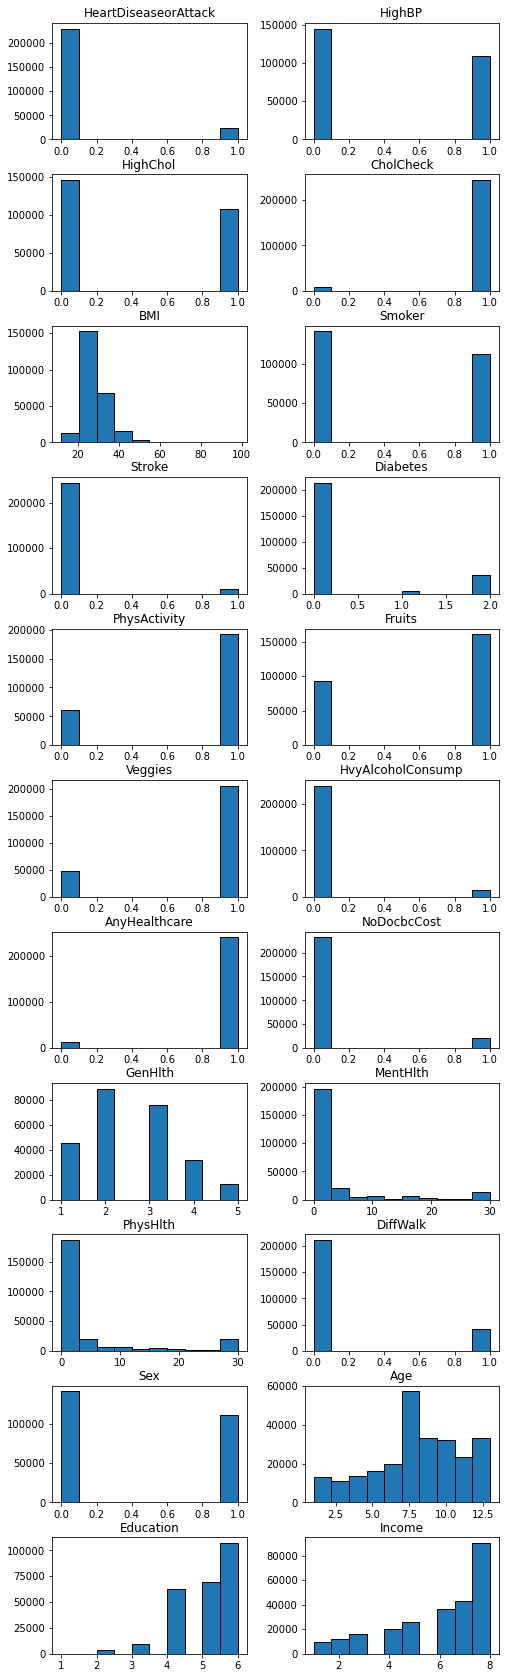

In [165]:
#define number of subplots
fig, axis = plt.subplots(11, 2,  figsize=(8,30))

#create histogram for each column in DataFrame
df.hist(ax=axis, edgecolor='black', grid=False)

In [166]:
df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [167]:
# Change data types

# List of columns to convert to categorical
columns_to_convert = ['CholCheck', 'PhysActivity', 'Fruits', 'Veggies', 'GenHlth', 
                      'MentHlth', 'PhysHlth', 'Education', 'Income']

# Convert specified columns to categorical data type
df[columns_to_convert] = df[columns_to_convert].astype('category')

# Verify the data types of the columns
print(df.dtypes)

HeartDiseaseorAttack       int64
HighBP                     int64
HighChol                   int64
CholCheck               category
BMI                        int64
Smoker                     int64
Stroke                     int64
Diabetes                   int64
PhysActivity            category
Fruits                  category
Veggies                 category
HvyAlcoholConsump          int64
AnyHealthcare              int64
NoDocbcCost                int64
GenHlth                 category
MentHlth                category
PhysHlth                category
DiffWalk                   int64
Sex                        int64
Age                        int64
Education               category
Income                  category
dtype: object


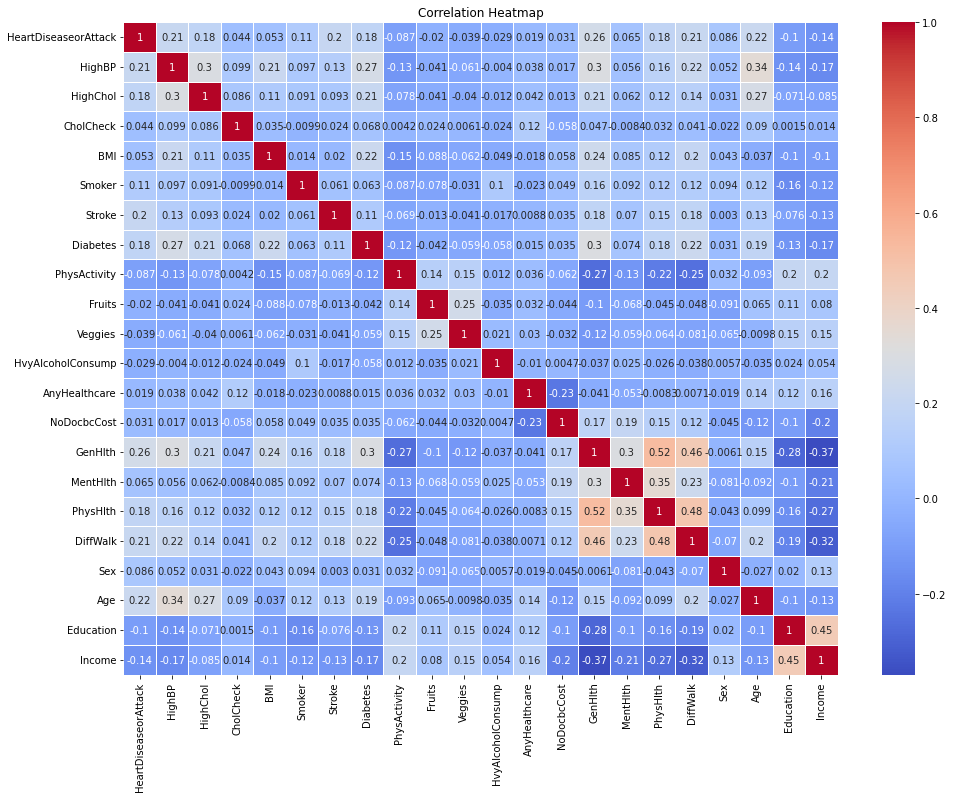

In [168]:
import seaborn as sns

plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

## Dependent Variable (DV)/ Label and (Independent Variable) IV

In [169]:
# DV: HeartDiseaseorAttack (0, 1)
# IV: the rest of the columns
print(df['HeartDiseaseorAttack'].value_counts())

print(23888/(23888+229773))
print("set scale pos weigth values around: ", 23888/(229773))

HeartDiseaseorAttack
0    229773
1     23888
Name: count, dtype: int64
0.09417293158979899


In [170]:
# evaluate xgboost algorithm for classification
from numpy import mean
from numpy import std
# from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer, average_precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot

In [171]:
xgb.__version__

'2.0.0'

In [177]:
# Define DV & IV

# cols_to_drop = []
# df_clean = df.drop(columns = cols_to_drop)
df_clean = df.copy()

# Labels / DV
y = df_clean['HeartDiseaseorAttack']
print("Distinct label values: ", y.unique())
y = np.array(y)
X = df_clean.loc[:, df_clean.columns != 'HeartDiseaseorAttack']

# One hot for categorical data
X_encoded = pd.get_dummies(X, columns= columns_to_convert)
# Replace True with 1 and False with 0
X_encoded = X_encoded.replace({True: 1, False: 0})
# X_encoded = X.copy()

# Display the updated DataFrame
X_encoded.head()

Distinct label values:  [0 1]


,HighBP,HighChol,BMI,Smoker,Stroke,Diabetes,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,DiffWalk,...,Education_5,Education_6,Income_1,Income_2,Income_3,Income_4,Income_5,Income_6,Income_7,Income_8
0,1,1,40,1,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0,25,1,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,0
2,1,1,28,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,27,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,1,24,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0


In [173]:
# Label proportion

print(sum(y)/ len(y))

print('Based on above label proportion, the data is not balanced. Need to use stratified when splitting data')


0.09417293158979899
Based on above label proportion, the data is not balanced. Need to use stratified when splitting data


In [178]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42, stratify= y)

# checking
print(sum(y_train)/ len(y_train))
print(sum(y_test)/ len(y_test))

print("Test data size from overal data:" , len(y_test)/(len(y_train)+len(y_test)))

0.09417330284632973
0.09417181783776965
Test data size from overal data: 0.2500029567020551


# Model 1 - Xgboost

## Initial Xgboost

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Balanced Accuracy: 55.34%
AUC ROC : 84.31%
AUC PR : 35.35%


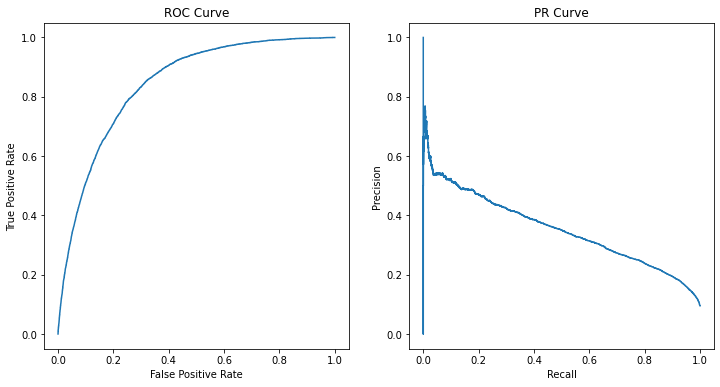

In [187]:
#Base score using default hyperparam of XGBoost

from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve, PrecisionRecallDisplay, RocCurveDisplay

model = xgb.XGBClassifier()
# model = xgb.XGBClassifier(enable_categorical = True)
model.fit(X_train, y_train)
print(model)

# make predictions for test data
y_pred = model.predict(X_test)
# print(np.unique(y_pred))
y_probs = model.predict_proba(X_test)
# y_probs = np.array(y_probs)
score = []
for row in y_probs:
    score.append(row[1])

# evaluate predictions
b_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy: %.2f%%" % (b_accuracy * 100.0))

roc_auc = roc_auc_score(y_test, score)
print("AUC ROC : %.2f%%" % (roc_auc * 100.0))

pr_auc = average_precision_score(y_test, score)
print("AUC PR : %.2f%%" % (pr_auc * 100.0))

# calculate roc curves
fpr, tpr, _ = roc_curve(y_test, score)
roc_display = RocCurveDisplay(fpr, tpr)

# PR Curve
prec, recall, _ = precision_recall_curve(y_test, score, pos_label=1)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall)

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Combine into one plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.title.set_text('ROC Curve')
ax2.title.set_text('PR Curve')
roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)
plt.show()

## Fine Tuning

In [188]:
# ROUND 1

# scale_pos_weight: to force the model to classify the minority correctly
# max_depth: maximal depth of the trees
# learning_rate: how big of a jump to the direction of global minima
# gamma: arbitrary threshold that govern the tree pruning process
# reg_lambda: regularization (aim to make small change in input should cause small change in output)

param_grid = {
    'max_depth' : [3, 4, 5],
    'learning_rate' : [0.1, 0.01, 0.05],
    'gamma': [0, 0.25, 1.0],
    'reg_lambda': [0, 1.0, 10.0]
    # , 'scale_pos_weight' : [0.03, 1, 3, 5, 30]
}

scoring = {'Accuracy' : 'accuracy',
          'Balance_Acc' : 'balanced_accuracy',
          "AUC_ROC": 'roc_auc', 
          "AUC_PR": 'average_precision'
          }

optimal_params = GridSearchCV(
    estimator = xgb.XGBClassifier(objective = 'binary:logistic', seed=42
                                  , subsample = 0.9, colsample_bytree = 0.5),
                              param_grid = param_grid,
                              scoring=scoring, refit="AUC_PR",
                              verbose = 0, 
                              n_jobs = 10,
                              cv = 3
                              )

optimal_params.fit(X_train, y_train)
print(optimal_params.best_params_)
print(optimal_params.best_score_)
print(optimal_params.best_estimator_)
print(optimal_params.best_index_)

{'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 10.0}
0.3780021457898128
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.25, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
35


In [189]:
# Result in ROUND 1:
# {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 1.0, 'scale_pos_weight': 0.03}
# AUC_PR = 0.37813116727844226

# Experiment Round 1 without scale_pos_weight
# {'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 10.0}
# AUC_PR =0.3780021457898128
# Further tuning based on the result in round 1

# ROUND 2
param_grid = {
    'max_depth' : [3, 5, 7, 10],
    'learning_rate' : [1, 0.5, 0.1],
    'gamma': [0, 0.25, 1.0]
    # ,'reg_lambda': [0.0, 1.0]
    ,'reg_lambda': [5, 10, 15]
    # ,'scale_pos_weight' : [0.03, 0.3, 1, 3]
}

scoring = {'Accuracy' : 'accuracy',
          'Balance_Acc' : 'balanced_accuracy',
          "AUC_ROC": 'roc_auc', 
          "AUC_PR": 'average_precision'
          }

optimal_params = GridSearchCV(
    estimator = xgb.XGBClassifier(objective = 'binary:logistic', seed=42
                                  , subsample = 0.9, colsample_bytree = 0.5),
                              param_grid = param_grid,
                              scoring=scoring, refit="AUC_PR",
                              verbose = 0, 
                              n_jobs = 10,
                              cv = 3
                              )

optimal_params.fit(X_train, y_train)
print(optimal_params.best_params_)
print(optimal_params.best_score_)
print(optimal_params.best_estimator_)
print(optimal_params.best_index_)

/Users/martawidyastuti/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 10}
0.3780021457898128
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.25, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
64


## Result V1

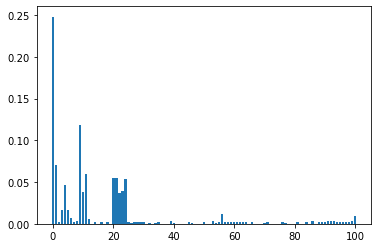

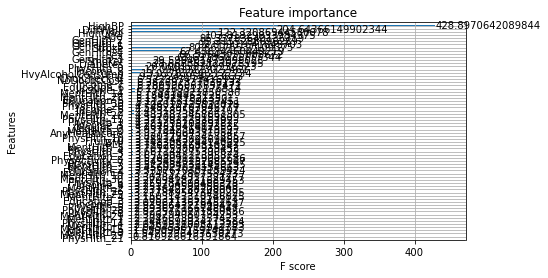

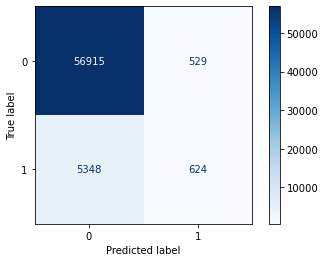

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     57444
           1       0.51      0.12      0.19      5972

    accuracy                           0.91     63416
   macro avg       0.71      0.55      0.57     63416
weighted avg       0.88      0.91      0.88     63416



In [197]:
# Result in ROUND 2:
# {'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 10}
# AUC PR: 0.3780021457898128

from sklearn.metrics import classification_report

clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic', seed = 42,
                            gamma=0.25, learning_rate = 0.1,
                            max_depth = 5, reg_lambda = 10.0
                            # ,scale_pos_weight = 0.03
                            )

clf_xgb.fit(X_train, y_train)

# print(clf_xgb.feature_importances_)

# plot
pyplot.bar(range(len(clf_xgb.feature_importances_)), clf_xgb.feature_importances_)
pyplot.show()

# plot feature importance
xgb.plot_importance(clf_xgb, importance_type = 'gain')
pyplot.show()

plot_confusion_matrix(clf_xgb, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

print(classification_report(y_test, y_pred))


In [199]:
print(clf_xgb.feature_importances_)
print(len(clf_xgb.feature_importances_))
len(X_test.columns)
X_test.columns

[0.24804877 0.07074318 0.0021678  0.01711855 0.04676567 0.01658008
 0.00754032 0.0022714  0.00377215 0.11835383 0.03848075 0.06004238
 0.00562682 0.         0.00206515 0.         0.00218679 0.
 0.00246808 0.         0.05512488 0.05513784 0.03683909 0.03901277
 0.05370418 0.00227742 0.00118964 0.00188047 0.00203697 0.00182196
 0.00215505 0.         0.00133285 0.         0.00095432 0.00191693
 0.         0.         0.         0.00334208 0.00118297 0.
 0.         0.         0.         0.00256424 0.00138616 0.
 0.         0.         0.00186104 0.         0.         0.00299859
 0.00089234 0.00191017 0.01156691 0.00252838 0.00199876 0.00212086
 0.00214099 0.00169666 0.00189137 0.00205048 0.00163299 0.
 0.00220948 0.         0.         0.         0.0012404  0.00254297
 0.         0.         0.         0.         0.00272168 0.00046899
 0.         0.         0.         0.00187246 0.         0.
 0.0016735  0.         0.00295692 0.         0.00211205 0.00179593
 0.00192921 0.00296904 0.00363204 0

Index(['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'Diabetes',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk',
       ...
       'Education_5', 'Education_6', 'Income_1', 'Income_2', 'Income_3',
       'Income_4', 'Income_5', 'Income_6', 'Income_7', 'Income_8'],
      dtype='object', length=101)

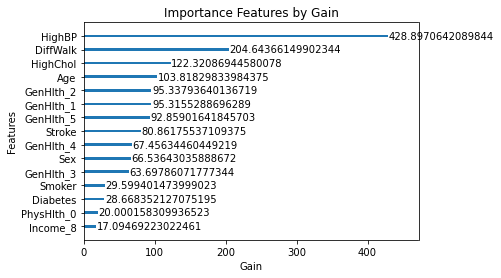

In [201]:
# plot feature importance by gain
xgb.plot_importance(clf_xgb, importance_type = "gain", 
                    title = "Importance Features by Gain", 
                    xlabel = "Gain", grid = False,
                    max_num_features = 15
                    , values_format= "{v}"
                    )
pyplot.show()

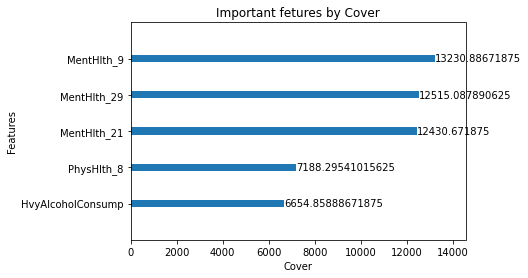

In [204]:
# plot feature importance by cover
xgb.plot_importance(clf_xgb, importance_type = "cover", 
                    title = "Important fetures by Cover", 
                    xlabel = "Cover", grid = False,
                    max_num_features = 5
                    # , values_format= "{v}"
                    ,values_format = "{v}"
                    )
pyplot.show()

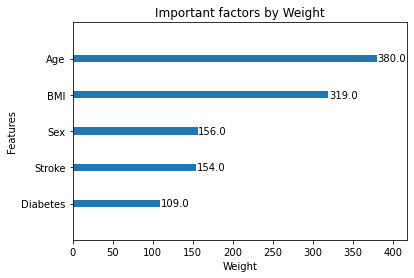

In [205]:
# plot feature importance by weight
xgb.plot_importance(clf_xgb, importance_type = "weight", 
                    title = "Important factors by Weight", 
                    xlabel = "Weight", grid = False,
                    max_num_features = 5
                    # , values_format= "{v}"
                    ,values_format = "{v}"
                    )
pyplot.show()

# Model 2 : Xgboost important features only

In [222]:
# Modify Categorical features

important_ftr = ['HighBP', 'DiffWalk', 'HighChol', 'Age', 'GenHlth', 'Stroke', 'Sex', 'Smoker', 'Diabetes', 'PhysHlth']
columns_to_convert = ['GenHlth', 'MentHlth', 'PhysHlth', 'Education', 'Income']

def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

print(intersection(important_ftr, columns_to_convert))


['GenHlth', 'PhysHlth']


0.09417330284632973
0.09417181783776965
Test data size from overal data: 0.2500029567020551
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
[0 1]
Balanced Accuracy: 54.58%
AUC ROC : 84.30%
AUC PR : 35.55%


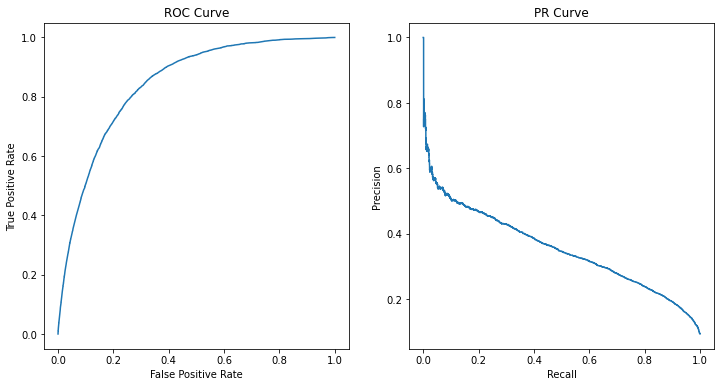

In [226]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a sample DataFrame
important_ftr = ['HighBP', 'DiffWalk', 'HighChol', 'Age', 'GenHlth', 'Stroke', 'Sex', 'Smoker', 'Diabetes', 'PhysHlth']
X = df_clean.loc[:, df_clean.columns != 'HeartDiseaseorAttack']
X_top = X[important_ftr]

# List of columns to convert to categorical
columns_to_convert = ['GenHlth', 'PhysHlth']

# One hot for categorical data
X_top_encoded = pd.get_dummies(X_top, columns= columns_to_convert)
# Replace True with 1 and False with 0
X_top_encoded = X_top_encoded.replace({True: 1, False: 0})

# Display the updated DataFrame
X_top_encoded.head()
X_train, X_test, y_train, y_test = train_test_split(X_top_encoded, y, random_state=42, stratify= y)
# checking
print(sum(y_train)/ len(y_train))
print(sum(y_test)/ len(y_test))
print("Test data size from overal data:" , len(y_test)/(len(y_train)+len(y_test)))

# Model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
print(model)

# make predictions for test data
y_pred = model.predict(X_test)
print(np.unique(y_pred))
y_probs = model.predict_proba(X_test)
# y_probs = np.array(y_probs)
score = []
for row in y_probs:
    score.append(row[1])

# evaluate predictions
b_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy: %.2f%%" % (b_accuracy * 100.0))

roc_auc = roc_auc_score(y_test, score)
print("AUC ROC : %.2f%%" % (roc_auc * 100.0))

pr_auc = average_precision_score(y_test, score)
print("AUC PR : %.2f%%" % (pr_auc * 100.0))

# calculate roc curves
fpr, tpr, _ = roc_curve(y_test, score)
roc_display = RocCurveDisplay(fpr, tpr)

# PR Curve
prec, recall, _ = precision_recall_curve(y_test, score, pos_label=1)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall)

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Combine into one plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.title.set_text('ROC Curve')
ax2.title.set_text('PR Curve')
roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)
plt.show()

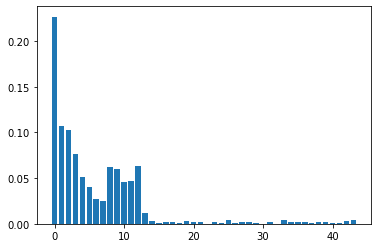

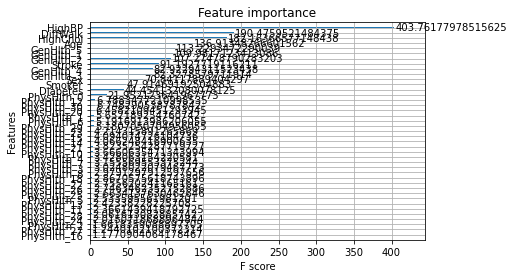

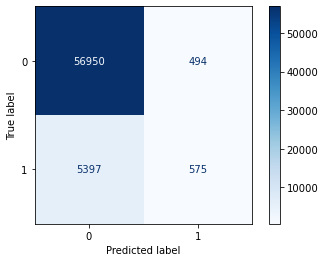

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     57444
           1       0.50      0.10      0.17      5972

    accuracy                           0.91     63416
   macro avg       0.71      0.55      0.56     63416
weighted avg       0.88      0.91      0.88     63416



In [229]:
from sklearn.metrics import classification_report

clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic', seed = 42,
                            gamma=0, learning_rate = 0.1,
                            max_depth = 4, reg_lambda = 1.0
                            )

clf_xgb.fit(X_train, y_train)

# print(clf_xgb.feature_importances_)

# plot
pyplot.bar(range(len(clf_xgb.feature_importances_)), clf_xgb.feature_importances_)
pyplot.show()

# plot feature importance
xgb.plot_importance(clf_xgb, importance_type = 'gain')
pyplot.show()

plot_confusion_matrix(clf_xgb, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

print(classification_report(y_test, y_pred))


In [228]:
# ROUND 1

# scale_pos_weight: to force the model to classify the minority correctly
# max_depth: maximal depth of the trees
# learning_rate: how big of a jump to the direction of global minima
# gamma: arbitrary threshold that govern the tree pruning process
# reg_lambda: regularization (aim to make small change in input should cause small change in output)

param_grid = {
    'max_depth' : [3, 4, 5],
    'learning_rate' : [0.1, 0.01, 0.05],
    'gamma': [0, 0.25, 1.0],
    'reg_lambda': [0, 1.0, 10.0]
    # , 'scale_pos_weight' : [0.03, 1, 3, 5, 30]
}

scoring = {'Accuracy' : 'accuracy',
          'Balance_Acc' : 'balanced_accuracy',
          "AUC_ROC": 'roc_auc', 
          "AUC_PR": 'average_precision'
          }

optimal_params = GridSearchCV(
    estimator = xgb.XGBClassifier(objective = 'binary:logistic', seed=42
                                  , subsample = 0.9, colsample_bytree = 0.5),
                              param_grid = param_grid,
                              scoring=scoring, refit="AUC_PR",
                              verbose = 0, 
                              n_jobs = 10,
                              cv = 3
                              )

optimal_params.fit(X_train, y_train)
print(optimal_params.best_params_)
print(optimal_params.best_score_)
print(optimal_params.best_estimator_)
print(optimal_params.best_index_)

/Users/martawidyastuti/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 4, 'reg_lambda': 1.0}
0.3762586407757685
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
4


# Model 3: CatBoost (continued in different jupyter notebook)